## **<span style="color:#023e8a;">Intro</span>**

**<span style="color:#023e8a;">The competition is dedicated to the product recomendations (H&M)  </span>**

**<span style="color:#023e8a;">Here we have different kinds of data that help us to get good recomendations: </span>**

📸 `images` - images of every article_id

🙋 `articles`  - detailed metadata of every article_id

👔 `customers`  - detailed metadata of every customer_id

🧾 `transactions_train`  - purchases with details

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [49]:
articles = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/articles.csv")
customers = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/customers.csv")
transactions = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv")

## **<span id="Articles" style="color:#023e8a;">2. Articles</span>**

**<span style="color:#023e8a;"> This table contains all h&m articles with details such as a type of product, a color, a product group and other features.</span>**  
**<span style="color:#023e8a;"> Article data description: </span>**

> `article_id` **<span style="color:#023e8a;">: A unique identifier of every article.</span>**  
> `product_code`, `prod_name` **<span style="color:#023e8a;">: A unique identifier of every product and its name (not the same).</span>**  
> `product_type`, `product_type_name` **<span style="color:#023e8a;">: The group of product_code and its name</span>**  
> `graphical_appearance_no`, `graphical_appearance_name` **<span style="color:#023e8a;">: The group of graphics and its name</span>**  
> `colour_group_code`, `colour_group_name` **<span style="color:#023e8a;">: The group of color and its name</span>**  
> `graphical_appearance_no`, `graphical_appearance_name` **<span style="color:#023e8a;">: The group of graphics and its name</span>**  
> `perceived_colour_value_id`, `perceived_colour_value_name`, `perceived_colour_master_id`, `perceived_colour_master_name` **<span style="color:#023e8a;">: The added color info</span>**  
> `department_no`, `department_name`: **<span style="color:#023e8a;">: A unique identifier of every dep and its name</span>**  
> `index_code`, `index_name`: **<span style="color:#023e8a;">: A unique identifier of every index and its name</span>**  
> `index_group_no`, `index_group_name`: **<span style="color:#023e8a;">: A group of indeces and its name</span>**  
> `section_no`, `section_name`: **<span style="color:#023e8a;">: A unique identifier of every section and its name</span>**  
> `garment_group_no`, `garment_group_name`: **<span style="color:#023e8a;">: A unique identifier of every garment and its name</span>**  
> `detail_desc`: **<span style="color:#023e8a;">: Details</span>**  

In [50]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [51]:
len(articles)

105542

In [52]:
def quick_dups(column_name, table=articles):
    dups = {}
    duplicates = 0
    for single in table[column_name]:
        if single not in dups:
            dups[single] = 0

        dups[single] += 1
        duplicates += 1

    dups1 = []
    dups2 = []
    for key in dups.keys():
        dups1.append(dups[key])
        dups2.append(key)
        
    print(duplicates, np.min(dups1), np.max(dups1), np.mean(dups1), np.median(dups1))
    
    ind = np.argsort(dups1)

    dups1 = np.flip(np.array(dups1)[ind])
    dups2 = np.flip(np.array(dups2)[ind])
    
    print(dups1[0:10])
    print(dups2[0:10])

In [53]:
quick_dups('product_code')

105542 1 75 2.2349229205488736 1.0
[75 70 52 49 46 44 41 41 41 41]
[783707 684021 699923 699755 685604 739659 664074 570002 685816 562245]


In [98]:
def quick_bar_chart(
    column_name, figsize, subset=None, table=articles, debug=False,
    labelAxisX='TODO', labelAxisY='TODO', labelTitle='TODO', save=None):
    
    data = {}
    for single in table[column_name]:
        if single not in data:
            data[single] = 0
        data[single] += 1
        
    if debug:
        print(data)

    dataArrKey = []
    dataArrCount = []
    for key in data.keys():
        dataArrKey.append(key)
        dataArrCount.append(data[key])

    if debug:
        print(dataArrKey)

    ind = np.argsort(dataArrCount)

    dataArrCountFlip = np.flip(np.array(dataArrCount)[ind])
    dataArrKeyFlip = np.flip(np.array(dataArrKey)[ind])
    
    if debug:
        print(dataArrKeyFlip)
    
    fig = plt.figure(figsize=figsize, dpi=80)
    ax = fig.add_axes([0,0,1,1])
    if subset != None:
        ax.bar(dataArrKeyFlip[0:subset],dataArrCountFlip[0:subset], facecolor='#CC071E')
    else:
        ax.bar(dataArrKeyFlip,dataArrCountFlip, facecolor='#CC071E')
    fig.align_labels()
    plt.xlabel(labelAxisX)
    plt.ylabel(labelAxisY)
    plt.title(labelTitle)
    
    if save != None:
        plt.savefig(save, dpi=80)
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
    plt.show()

In [55]:
#prod_name, detail_desc
#quick_bar_chart('product_type_name', (15, 3))

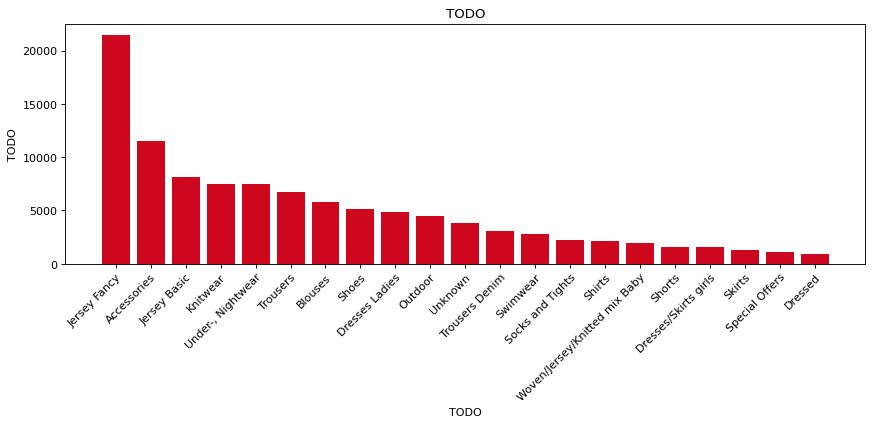

In [56]:
quick_bar_chart('garment_group_name', (10, 3))

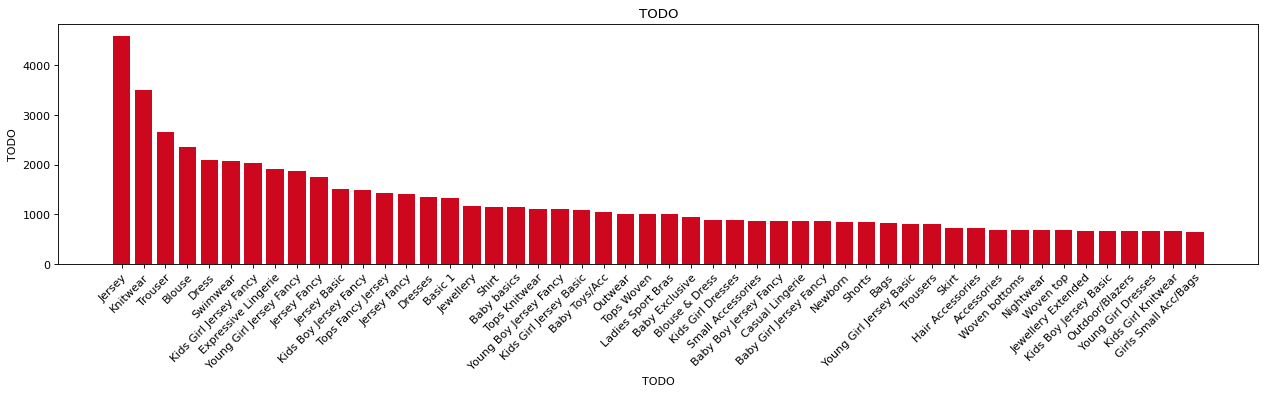

In [57]:
quick_bar_chart('department_name', (15, 3), True)

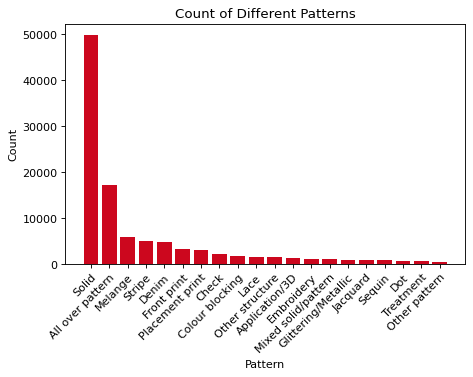

In [105]:
quick_bar_chart('graphical_appearance_name', (5, 3), subset=20, labelAxisX='Pattern', labelAxisY='Count', labelTitle='Count of Different Patterns')

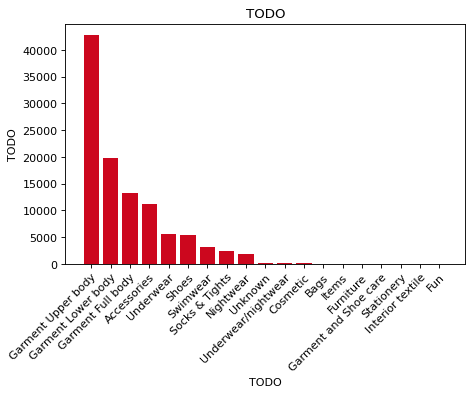

In [59]:
quick_bar_chart('product_group_name', (5, 3))

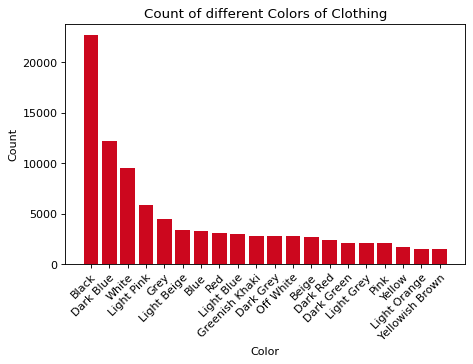

In [102]:
quick_bar_chart('colour_group_name', (5, 3),
                labelAxisX='Color',
                labelAxisY='Count',
                labelTitle='Count of different Colors of Clothing',
                save='color-count.png',
                subset=20)

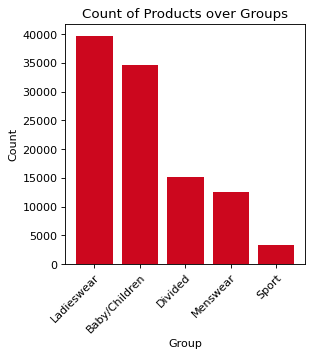

In [110]:
quick_bar_chart('index_group_name', (3, 3), labelAxisX='Group', labelAxisY='Count', labelTitle='Count of Products over Groups')

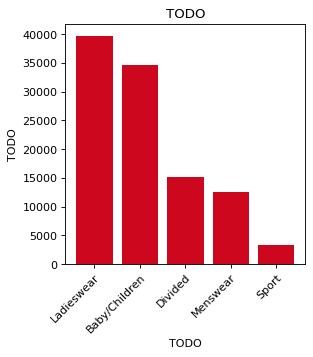

In [62]:
quick_bar_chart('index_group_name', (3, 3)) # same as above, redundant column

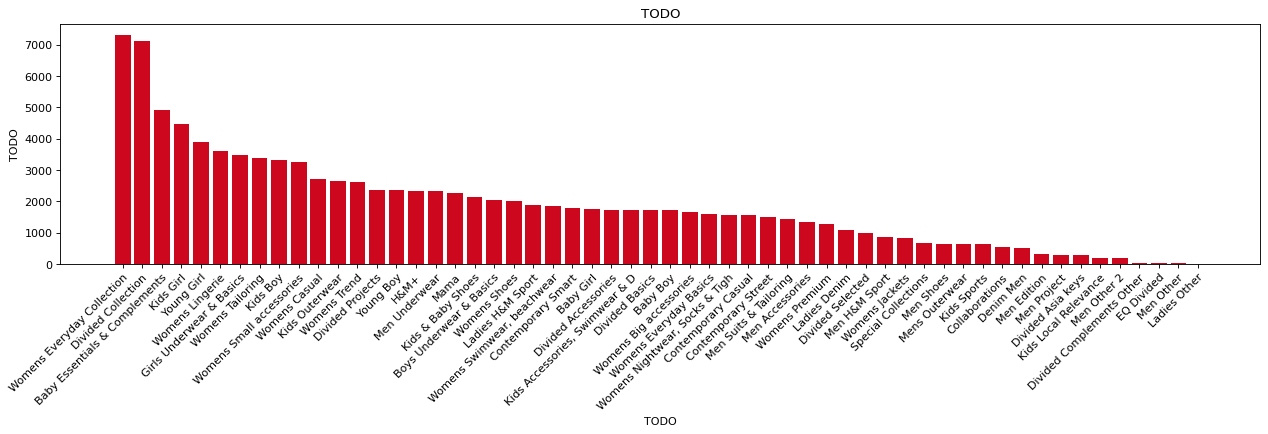

In [63]:
quick_bar_chart('section_name', (15, 3))

**<span style="color:#023e8a;"> Customers data description: </span>**

> `customer_id` **<span style="color:#023e8a;">: A unique identifier of every customer</span>**  
> `FN` **<span style="color:#023e8a;">: 1 or missed </span>**  
> `Active` **<span style="color:#023e8a;">: 1 or missed</span>**  
> `club_member_status` **<span style="color:#023e8a;">: Status in club</span>**  
> `fashion_news_frequency` **<span style="color:#023e8a;">: How often H&M may send news to customer</span>**  
> `age` **<span style="color:#023e8a;">: The current age</span>**  
> `postal_code` **<span style="color:#023e8a;">: Postal code of customer</span>**  

In [64]:
pd.options.display.max_rows = 50
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [65]:
#quick_bar_chart('postal_code', (3, 3), False, customers, True)
len(customers)

1371980

In [66]:
quick_dups('postal_code', customers)

1371980 1 120303 3.88774125174625 3.0
[120303    261    159    157    156    154    141    138    134    132]
['2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c'
 'cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8'
 '714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1'
 '7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7'
 '5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145'
 '1f5bd429acc88fbbf24de844a59e438704aa8761bc7b99fd977cad297c50b74c'
 '9d5787501bf1c77592156ba51eab13f4a2670c807686431a9e22a69090b02358'
 'a1959a16bf167858c93a66ec2a330644512b25fb10f97eee2058549885af4dbd'
 '087a46b65170845b4a55226ff1eb748ce7843d4b637cbe17f6bfbd1e645d2ffb'
 '4d22901a97bd952bb92cdd31b38c39b41dd3250a735cabdfac1503eb405b807d']


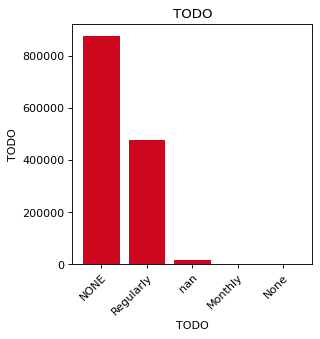

In [67]:
quick_bar_chart('fashion_news_frequency', (3, 3), False, customers)

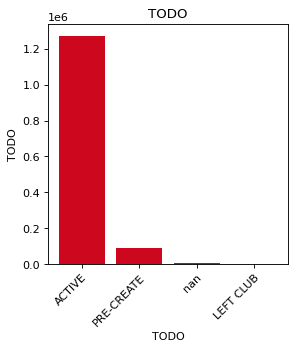

In [68]:
quick_bar_chart('club_member_status', (3, 3), False, customers)

In [69]:
customers['age']

0          49.0
1          25.0
2          24.0
3          54.0
4          52.0
           ... 
1371975    24.0
1371976    21.0
1371977    21.0
1371978    18.0
1371979    65.0
Name: age, Length: 1371980, dtype: float64

In [70]:
np.max(customers['age']), np.min(customers['age']), np.mean(customers['age']), np.median(customers['age'])

(99.0, 16.0, 36.386964565794, nan)

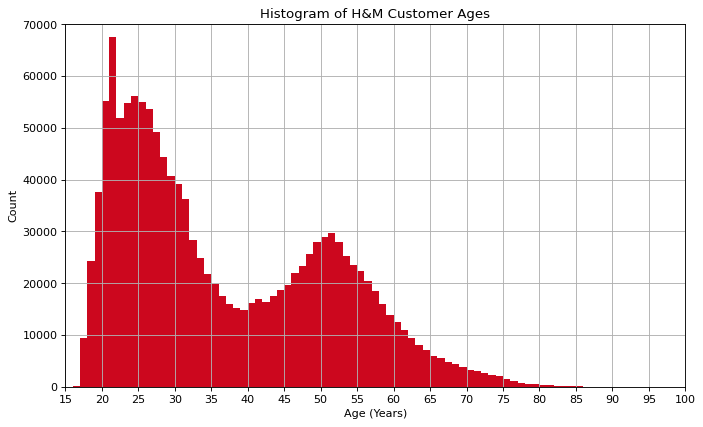

In [111]:
plt.figure(figsize=(10, 6), dpi=80)
n, bins, patches = plt.hist(customers['age'], 99-16, density=False, facecolor='#CC071E')#, facecolor='g', alpha=0.75)
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.title('Histogram of H&M Customer Ages')
plt.xlim(15, 100)
plt.ylim(0, 70000)
plt.grid(True)
plt.xticks(np.arange(15, 105, step=5))
plt.savefig("histogram-customer-ages.png", dpi=80, format='png')
plt.show()

## **<span id="Transactions" style="color:#023e8a;">4. Transactions</span>**

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Go to Table of Content</span>**](#Content)

**<span style="color:#023e8a;"> Transactions data description: </span>**

> `t_dat` **<span style="color:#023e8a;">: A unique identifier of every customer</span>**  
> `customer_id` **<span style="color:#023e8a;">: A unique identifier of every customer </span>**  **<span style="color:#FF0000;">(in </span>** `customers` **<span style="color:#FF0000;"> table)</span>**  
> `article_id` **<span style="color:#023e8a;">: A unique identifier of every article</span>**  **<span style="color:#FF0000;">(in </span>** `articles` **<span style="color:#FF0000;"> table)</span>**  
> `price` **<span style="color:#023e8a;">: Price of purchase</span>**  
> `sales_channel_id` **<span style="color:#023e8a;">: 1 or 2</span>**  

In [112]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [113]:
len(transactions)

31788324

In [114]:
from datetime import datetime

In [115]:
datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

datetime.datetime(2005, 6, 1, 13, 33)

In [116]:
datetime.strptime('2018-09-20', '%Y-%m-%d')

datetime.datetime(2018, 9, 20, 0, 0)

In [117]:
transactionsDay1 = {}
transactionsMonth1 = {}
for index in range(0, len(transactions['t_dat']),100):
    
    if index % int(len(transactions['t_dat'])/100) == 0:
        print(index / len(transactions['t_dat']))

    date = transactions['t_dat'][index]
    
    dateF = datetime.strptime(date, '%Y-%m-%d')
    
    dateS1 = dateF.strftime('%Y-%m-%d')
    dateS2 = dateF.strftime('%Y-%m')
    
    if dateS1 not in transactionsDay1:
        transactionsDay1[dateS1] = 0
    
    if dateS2 not in transactionsMonth1:
        transactionsMonth1[dateS2] = 0
    
    transactionsDay1[dateS1] += 1
    transactionsMonth1[dateS2] += 1
    
datesDay = []
transactionsDay = []
for date in transactionsDay1.keys():
    datesDay.append(datetime.strptime(date, '%Y-%m-%d'))
    transactionsDay.append(transactionsDay1[date])
    
datesDay7 = []
transactionsDay7 = []
transactionsDay7Avg = []
for i in range(0,len(datesDay)-7,7):
    transactionsSum = 0
    for j in range(i,i+7):
        transactionsSum += transactionsDay[j]
    
    datesDay7.append(datesDay[i])
    transactionsDay7.append(transactionsSum)
    transactionsDay7Avg.append(transactionsSum/7)
    
datesMonth = []
transactionsMonth = []
for date in transactionsMonth1.keys():
    datesMonth.append(datetime.strptime(date, '%Y-%m'))
    transactionsMonth.append(transactionsMonth1[date])

0.0
0.9999992450058078


In [118]:
np.min(datesDay), np.max(datesDay), len(datesDay), len(datesDay)/365, datesDay[0:10]

(datetime.datetime(2018, 9, 20, 0, 0),
 datetime.datetime(2020, 9, 22, 0, 0),
 734,
 2.010958904109589,
 [datetime.datetime(2018, 9, 20, 0, 0),
  datetime.datetime(2018, 9, 21, 0, 0),
  datetime.datetime(2018, 9, 22, 0, 0),
  datetime.datetime(2018, 9, 23, 0, 0),
  datetime.datetime(2018, 9, 24, 0, 0),
  datetime.datetime(2018, 9, 25, 0, 0),
  datetime.datetime(2018, 9, 26, 0, 0),
  datetime.datetime(2018, 9, 27, 0, 0),
  datetime.datetime(2018, 9, 28, 0, 0),
  datetime.datetime(2018, 9, 29, 0, 0)])

In [119]:
np.min(datesMonth), np.max(datesMonth), len(datesMonth), len(datesMonth)/12

(datetime.datetime(2018, 9, 1, 0, 0),
 datetime.datetime(2020, 9, 1, 0, 0),
 25,
 2.0833333333333335)

In [120]:
np.min(transactionsDay), np.max(transactionsDay), transactionsDay[0:10]

(128, 1986, [484, 476, 176, 523, 459, 439, 482, 443, 669, 1417])

In [121]:
np.min(transactionsMonth), np.max(transactionsMonth), transactionsMonth[0:10]

(5948,
 19062,
 [5948, 13971, 12706, 11488, 12635, 11524, 12867, 14765, 15603, 19062])

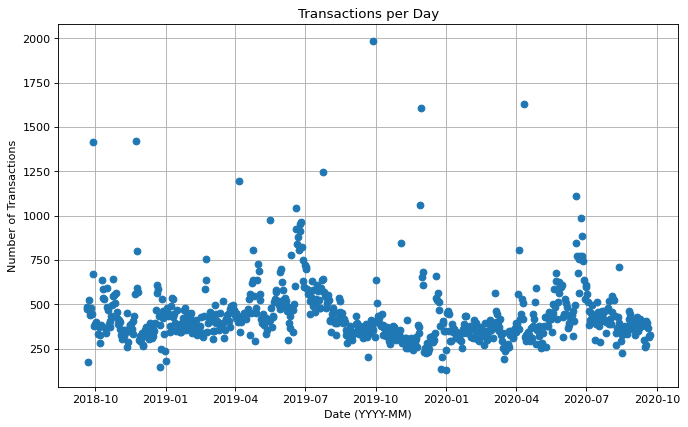

In [122]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot_date(datesDay, transactionsDay)
plt.grid(True)
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Number of Transactions')
plt.title('Transactions per Day')
plt.show()

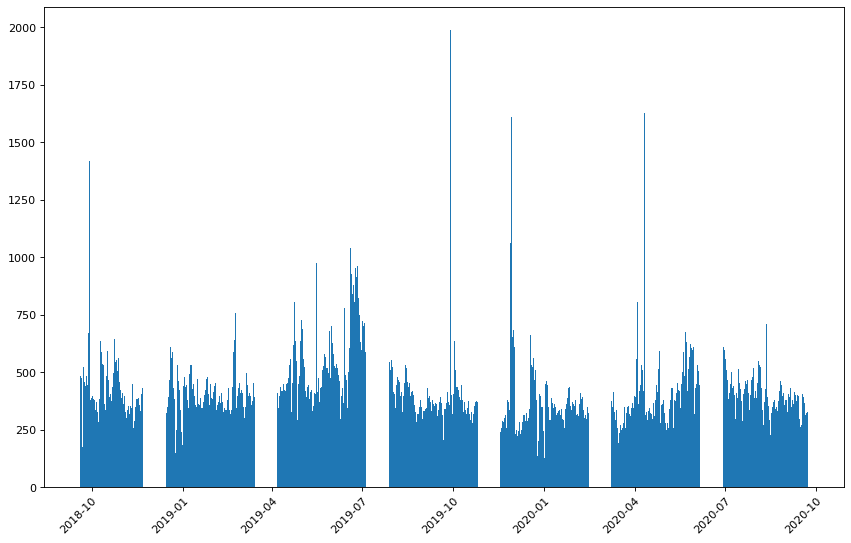

In [123]:
fig = plt.figure(figsize=(10,6), dpi=80)
ax = fig.add_axes([0,0,1,1])
ax.bar(datesDay,transactionsDay)
fig.align_labels()
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

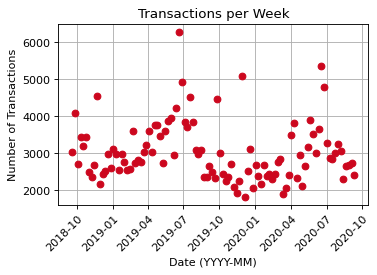

In [135]:
plt.figure(figsize=(5, 3), dpi=80)
plt.plot_date(datesDay7, transactionsDay7, color='#CC071E')
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Number of Transactions')
plt.title('Transactions per Week')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.grid(True)
plt.show()

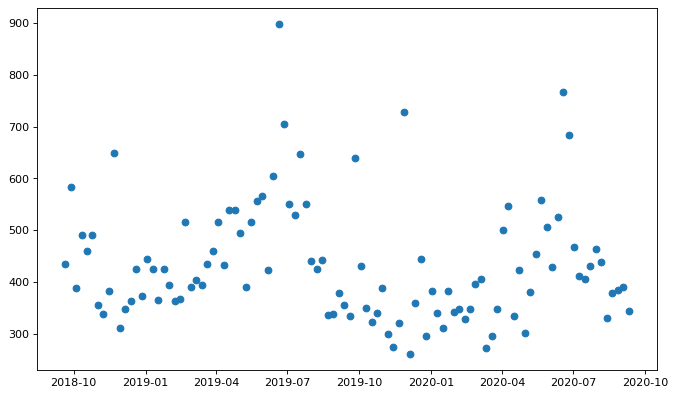

In [125]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot_date(datesDay7, transactionsDay7Avg)
plt.show()

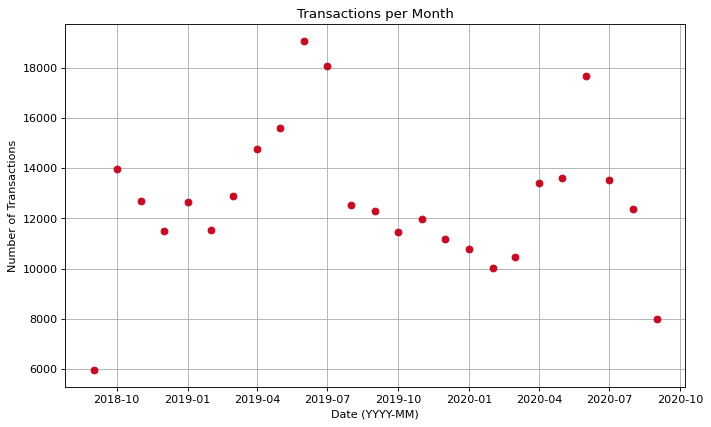

In [131]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot_date(datesMonth, transactionsMonth, color='#CC071E')
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Number of Transactions')
plt.title('Transactions per Month')
plt.grid(True)
plt.show()

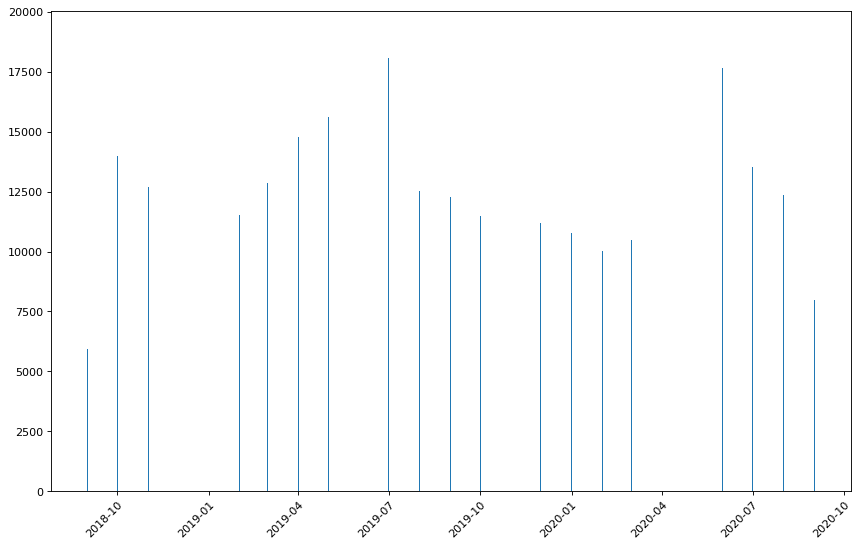

In [127]:
fig = plt.figure(figsize=(10,6), dpi=80)
ax = fig.add_axes([0,0,1,1])
ax.bar(datesMonth,transactionsMonth)
fig.align_labels()
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.


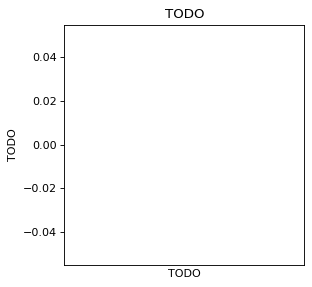

In [128]:
quick_bar_chart('t_dat', (3, 3), False, transactions)